# Data Wrangling Project: WeRateDogs Twitter Data Analysis

In [1]:
# Import Packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import requests
import os
import json
import tweepy
import re
import warnings
warnings.filterwarnings('ignore')

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Read Twitter archive data as tad
tad = pd.read_csv('twitter-archive-enhanced.csv', sep = ',')

In [3]:
# Check the first 5 rows
tad.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# Check the last 5 rows
tad.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
# Create a directory if it does not exist
folder_name = 'image_predictions'
if not os.path.exists (folder_name):
    os.makedirs(folder_name)

In [6]:
# Store url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [7]:
# Open the file
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [8]:
# Read url into a DataFrame
url_df = pd.read_csv(url, sep = '\t')

In [9]:
# Read the first 5 rows of the url_df
url_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
# Read the last five rows of the url_df
url_df.tail(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)
> I do not have the twitter API, so I am going to read the Tweet_json.txt file that was provided and append it to a DataFrame.

In [11]:
# Create an empty list
tweets_list = []
# Open and read txt file
with open('tweet-json.txt') as file:
    for line in open('tweet-json.txt', 'r'):
        t= json.loads(line)
        tweet_id = t['id']
        retweet_count = t['retweet_count']
        favorite_count = t['favorite_count']
        # Append to list
        tweets_list.append({'tweet_id':tweet_id, 
                    'retweet_count':retweet_count,
                    'favorite_count':favorite_count})
df_tweets = pd.DataFrame(tweets_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [12]:
# Check the first 5 rows of df_tweets
df_tweets.head(5)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [13]:
# Check the last 5 rows of df_tweets
df_tweets.tail(5)

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


## Assessing Data

##### Twitter Archive Data - Tad Column Description.

In [14]:
tad.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [15]:
tad.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

> A brief Description of each Column name

1. tweet_id - This column contains the unique identification number for each tweet by @WeRateDogs
2. in_reply_to_status_id - This column contains the integer representation of the original tweet's identification if the presented tweet is a reply.
3. in_reply_to_user_id - This column contains the integer representation of the original tweet's author identification if the represented tweet is a reply.
4. timestamp - This column contains the time the tweet was made.
5. source - This column contains the source of the tweet.
6. text - This column contains the tweet content.
7. retweeted_status_id - This column contains the original tweet that was retweeted.
8. retweeted_status_user_id - This column contains the identification of the retweeted user status.
9. retweeted_status_timestamp - This column contains a representation of the time of retweet for the original tweet.
10. expanded_urls - This column contains the link of the tweet.
11. rating_numerator - This column contains the rating numerator.
12. rating_denominator - This column contains the rating denominator which should always be 10.
13. name - This column contains the dog name.
14. doggo - This column contains one of the dog stages.
15. floofer- This column contains one of the dog stages.
16. pupper - This column contains one of the dog stages.
17. puppo - This column contains one of the dog stages.


#### Visual Assessment.

In [16]:
tad

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### Programatic Assessment.

In [17]:
# check the first 10 rows
tad.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [18]:
# Check the last 10 rows
tad.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [19]:
# Check 10 random rows
tad.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1240,712085617388212225,NaN,NaN,2016-03-22 01:16:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Olive and Ruby. They are best bud...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712085617...,11,10,Olive,None,None,None,None
1174,720059472081784833,NaN,NaN,2016-04-13 01:22:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charleson. He lost his plunger. Looked...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720059472...,9,10,Charleson,None,None,None,None
1546,689283819090870273,NaN,NaN,2016-01-19 03:10:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Chipson. He's aerodynamic af. No ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689283819...,9,10,Chipson,None,None,None,None
432,820749716845686786,NaN,NaN,2017-01-15 21:49:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sunny. He can take down a polar bear in o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820749716...,13,10,Sunny,None,None,None,None
1836,676098748976615425,NaN,NaN,2015-12-13 17:57:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extremely rare pup here. Very religious. Alway...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676098748...,3,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
431,820837357901512704,NaN,NaN,2017-01-16 03:37:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Finn. He's wondering if...,8.192277e+17,4.196984e+09,2017-01-11 17:01:16 +0000,https://twitter.com/dog_rates/status/819227688...,12,10,Finn,None,None,None,None
1019,746790600704425984,NaN,NaN,2016-06-25 19:42:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you just can't resist... 10/10 topnotch t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746790600...,10,10,None,None,None,None,None
830,768855141948723200,NaN,NaN,2016-08-25 16:58:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jesse. He really wants a belly rub. Wi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768855141...,11,10,Jesse,None,None,None,None
703,785927819176054784,NaN,NaN,2016-10-11 19:39:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's strives to be the best pot...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785927819...,12,10,Lucy,None,None,None,None


In [20]:
# Get the number of rows and columns
tad.shape

(2356, 17)

In [21]:
print('Number of rows is', tad.shape[0])
print('Number of columns is', tad.shape[1])

Number of rows is 2356
Number of columns is 17


In [22]:
# Get a concise summary
tad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [23]:
# Get the statistics of tad dataframe
tad.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [24]:
# Check for duplicates
tad.duplicated().sum()

0

In [25]:
# Check for null values
tad.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [26]:
# Get the count of unique values in rating_denominator column and sort in descending order
tad['rating_denominator'].value_counts().sort_index(ascending=False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

In [27]:
# Get rows where the rating_denominator is not equal to 10
unequal_den = tad.rating_denominator[tad.rating_denominator !=10]

In [28]:
len(unequal_den)

23

The output above shows that there are 23 rows where the rating denominator is not equal to 10. This will be addressed if it is inconsistent. Let us do thesame for rating numerator

In [29]:
# Get the count of unique values in rating_numerator column and sort in descending order
tad['rating_numerator'].value_counts().sort_index(ascending=False)

1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

As seen above, there are rows where the rating numerator is greater than 10. This will not be addressed as it complies with the unique rating system for @DogRates.

In [30]:
# Get the count of unique values for name column
tad['name'].value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Tucker        10
Penny         10
Lola          10
Winston        9
Bo             9
Sadie          8
the            8
an             7
Toby           7
Bailey         7
Daisy          7
Buddy          7
Leo            6
Scout          6
Stanley        6
Milo           6
Rusty          6
Bella          6
Jack           6
Jax            6
Koda           6
Oscar          6
Dave           6
Chester        5
            ... 
Halo           1
Ashleigh       1
Pherb          1
Jonah          1
Barclay        1
Gin            1
Bruno          1
Einstein       1
Sojourner      1
space          1
Stuart         1
Jimbo          1
Dallas         1
Skye           1
Kirk           1
Beckham        1
Brooks         1
Mimosa         1
Rinna          1
Miley          1
Marlee         1
Kevon          1
Dunkin         1
General        1
Severus        1
Anthony        1
Zuzu           1
Puff          

Did you notice that some names start with lowercase and does not seem to be dogs names?. We should dig further to understand what is going on.

In [31]:
n_low = tad.name.str.contains('^[a-z]', regex = True)
tad[n_low].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [32]:
len(tad[n_low].name)

109

The assessment shows that there are 109 rows that start with lowercase and they are not dog names.

In [33]:
# get the count of unique values in source columns
tad.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Won't this be better if the source column says Twitter for Iphone, Vine - Make a Scene, Twitter Web Client and TweetDeck?.

In [34]:
# get the content of text in the first column
tad.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

### Accessing the next Dataset- Url_df ( The Image Prediction Data)

In [35]:
# Get the column names for url_df
url_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

* Brief Description of Column Names.
1. tweet_id - This column contains the unique identification numbet for each tweet by the account.
2. jpg_url - This column contains the url for the dog image.
3. img_num - This column contains the image number which usually ranges from 1-4.
4. p1 - This column contains the algorithmic prediction #1 for the tweet image.
5. p1_conf - This column contains the prediction confidence for p1.
6. p1_dog - This column shows whether or not the algorithmic prediction for p1 is a dog breed.
7. p2 -  This column contains the algorithmic prediction #2 for the tweet image.
8. p2_conf - This column contains the prediction confidence for p2.
9. p2_dog - This column shows whether or not the algorithmic prediction for p2 is a dog breed.
10. p3 -  This column contains the algorithmic prediction #3 for the tweet image.
11. p3_conf - This column contains the prediction confidence for p3.
12. p3_dog - This column shows whether or not the algorithmic prediction for p3 is a dog breed.

#### Visual Assessment.

In [36]:
url_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### Programatic Assessment.

In [37]:
# Check the first 10 rows
url_df.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [38]:
# Check the last 10 rows
url_df.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [39]:
# Check 10 random rows
url_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1278,750101899009982464,https://pbs.twimg.com/media/Cmjlsh1XgAEvhq_.jpg,2,golden_retriever,0.316704,True,llama,0.174269,False,Labrador_retriever,0.147364,True
226,670361874861563904,https://pbs.twimg.com/media/CU2akCQWsAIbaOV.jpg,1,platypus,0.974075,False,spotted_salamander,0.011068,False,bison,0.003897,False
926,702598099714314240,https://pbs.twimg.com/media/CcAhPevW8AAoknv.jpg,1,kelpie,0.219179,True,badger,0.133584,False,Siamese_cat,0.074440,False
1476,780496263422808064,https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg,1,pug,0.997310,True,Brabancon_griffon,0.001186,True,French_bulldog,0.000428,True
840,694669722378485760,https://pbs.twimg.com/media/CaP2bS8WYAAsMdx.jpg,2,beaver,0.457094,False,mongoose,0.228298,False,marmot,0.148309,False
397,673662677122719744,https://pbs.twimg.com/media/CVlUfBbUwAQyfcD.jpg,1,Labrador_retriever,0.957670,True,beagle,0.012413,True,golden_retriever,0.005689,True
1918,855459453768019968,https://pbs.twimg.com/media/C98z1ZAXsAEIFFn.jpg,2,Blenheim_spaniel,0.389513,True,Pekinese,0.188220,True,Japanese_spaniel,0.082628,True
1961,866450705531457537,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2,French_bulldog,0.905334,True,Boston_bull,0.078060,True,pug,0.001771,True
1892,849336543269576704,https://pbs.twimg.com/media/C8lzFC4XcAAQxB4.jpg,1,patio,0.521788,False,prison,0.149544,False,restaurant,0.027153,False
967,706310011488698368,https://pbs.twimg.com/media/Cc1RNHLW4AACG6H.jpg,1,Pembroke,0.698165,True,Chihuahua,0.105834,True,bloodhound,0.062030,True


In [40]:
# get a concise summary for url_df
url_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [41]:
# Get the statistics for url_df
url_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [42]:
# Get a sum of all duplicates
url_df.duplicated().sum()

0

In [43]:
# Check for null values
url_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [44]:
# get the number of rows and columns
print('The Number of rows is',url_df.shape[0])
print('The Number of columns is', url_df.shape[1])

The Number of rows is 2075
The Number of columns is 12


In [45]:
# get the count of values in p1_dog column
url_df.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [46]:
# get the value count for P1 column
url_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
Cardigan                      19
web_site                      19
beagle                        18
teddy                         18
Eskimo_dog                    18
Shetland_sheepdog             18
Maltese_dog                   18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [47]:
# get the value count for p1_conf column
url_df.p1_conf.value_counts()

0.366248    2
0.713293    2
0.375098    2
0.636169    2
0.611525    2
0.420463    2
0.581403    2
0.403698    2
0.530104    2
0.254856    2
0.346545    2
0.721188    2
0.677408    2
0.907083    2
0.243529    2
0.505370    2
0.593858    2
0.372202    2
0.274637    2
0.600276    2
0.506312    2
0.615163    2
0.556595    2
0.995143    2
0.809197    2
0.964929    2
0.777468    2
0.336200    2
0.617389    2
0.786089    2
           ..
0.483228    1
0.556524    1
0.176423    1
0.318981    1
0.733025    1
0.730152    1
0.436023    1
0.479008    1
0.162935    1
0.897162    1
0.320420    1
0.999833    1
0.995873    1
0.523206    1
0.942911    1
0.537652    1
0.672791    1
0.952258    1
0.855959    1
0.665578    1
0.841265    1
0.668164    1
0.946828    1
0.714719    1
0.352946    1
0.713102    1
0.765266    1
0.491022    1
0.905334    1
1.000000    1
Name: p1_conf, Length: 2006, dtype: int64

#### Accessing df_tweets (Tweets Data).

In [48]:
df_tweets.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

> Brief Description of columns.

1. tweet_id - This column contains the unique identification number for each tweet made by @DogRates.
2. retweet_count - This column contains the number of times the tweet was retweeted.
3. favorite_count - This column contains the number of times the tweet was liked.

#### Visual Assessment

In [49]:
df_tweets

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


#### Programatic Assessment.

In [50]:
# Get the first 10 rows
df_tweets.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [51]:
# Get the last 10 rows
df_tweets.tail(10)

,tweet_id,retweet_count,favorite_count
2344,666058600524156928,61,115
2345,666057090499244032,146,304
2346,666055525042405380,261,448
2347,666051853826850816,879,1253
2348,666050758794694657,60,136
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [52]:
# check random rows
df_tweets.sample(10)

,tweet_id,retweet_count,favorite_count
1982,672902681409806336,550,1452
1203,715928423106027520,987,3485
2255,667728196545200128,162,398
2212,668544745690562560,250,561
1498,692158366030913536,896,2369
1,892177421306343426,6514,33819
540,806242860592926720,13616,0
1739,679475951516934144,728,2304
1473,693642232151285760,472,2790
960,750868782890057730,1595,5306


In [53]:
# get a concise summary
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [54]:
# get the statistics of the dataset
df_tweets.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [55]:
# Get the number of columns and rows
print('The Number of rows is', df_tweets.shape[0])
print('The Number of rows is', df_tweets.shape[1])

The Number of rows is 2354
The Number of rows is 3


In [56]:
# check for duplicates 
df_tweets.duplicated().sum()

0

In [57]:
# check for null values
df_tweets.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

### Quality issues
1. Retweeted status id is not null in some columns and not needed

2. Rating denominator is not equal to 10 in some rows

3. There are redundant data is the text column

4. Missing values in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_id, retweeted_status_timestamp, and expanded_url columns.

5. Unnecessary column in url_df; image number

6. Incorrect dog names in name column

7. Source column in tad is a href instead of text

8. Timestamp is a string instead of datetime datatype.

9. Tweet id is an integer instead of string.

### Tidiness issues
1.  p1, p2, and p3 dog datatype should be a categorical datatype

2. Tad, url_df and df_tweets should be merged on tweet id

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [58]:
# Make copies of original pieces of data
tad_clean = tad.copy()
url_clean = url_df.copy()
tweets_clean = df_tweets.copy()

### Issue #1: Retweeted status id is not null in some columns and not needed.

#### Define: drop rows where retweeted status id is not null.

#### Code

In [59]:
# Use rows where retweet is null
tad_clean = tad_clean[tad_clean.retweeted_status_id.isnull()]

#### Test

In [60]:
tad_clean.retweeted_status_id.notnull().sum()

0

In [61]:
tad_clean.retweeted_status_user_id.notnull().sum()

0

In [62]:
tad_clean.retweeted_status_timestamp.notnull().sum()

0

Issue 1 has been rectified.

### Issue #2: Rating denominator is not equal to 10 in some rows.

#### Define: Drop rows where the rating denominator is not equal to 10.

#### Code

In [63]:
len(unequal_den)

23

In [64]:
tad_clean = tad_clean[tad_clean['rating_denominator'] == 10]

#### Test

In [65]:
len(tad_clean.rating_denominator[tad_clean.rating_denominator != 10])

0

Cleaning complete for issue 2

### Issue 3: There are redundant data is the text column

#### Define: Instead of having several dog stages column, join puppo, floofer, doggo and pupper column together.

#### Code

In [66]:
tad_clean['puppo'].replace('None', '', inplace = True)
tad_clean['floofer'].replace('None', '', inplace = True)
tad_clean['doggo'].replace('None', '', inplace = True)
tad_clean['pupper'].replace('None', '', inplace = True)

In [67]:
tad_clean['dog_stages'] = tad_clean[['puppo', 'floofer', 'doggo', 'pupper']].apply(lambda x : ''.join(x), axis=1)

In [68]:
#check 
tad_clean['dog_stages'].value_counts()

                1809
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
flooferdoggo       1
puppodoggo         1
Name: dog_stages, dtype: int64

In [69]:
# put a hyphen in doggopupper, puppodoggo and flooferdoggo
tad_clean['dog_stages'].mask(tad_clean['dog_stages'] == 'doggopupper', 'doggo-pupper', inplace = True)
tad_clean['dog_stages'].mask(tad_clean['dog_stages'] == 'puppodoggo', 'puppo-doggo', inplace = True)
tad_clean['dog_stages'].mask(tad_clean['dog_stages'] == 'flooferdoggo', 'floffer-doggo', inplace = True)

In [70]:
# Replace space with None
tad_clean['dog_stages'] = tad_clean['dog_stages'].replace('', 'None')

In [71]:
# drop pupper, doggo, puppo, floofer columns
tad_clean.drop(['pupper','doggo', 'puppo','floofer' ], axis =1, inplace = True)

#### Test

In [72]:
# check if the drop was successful
tad_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stages'],
      dtype='object')

In [73]:
# check if the hyphen was added
tad_clean['dog_stages'].value_counts()

None             1809
pupper            224
doggo              75
puppo              24
doggo-pupper       10
floofer             9
floffer-doggo       1
puppo-doggo         1
Name: dog_stages, dtype: int64

cleaning complete for issue 2

### Issue 4: Missing values in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_id, retweeted_status_timestamp, and expanded_url columns.

#### Define: Drop  in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_id, retweeted_status_timestamp, and expanded_url columns as they have missing values.

#### Code

In [74]:
tad_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stages'],
      dtype='object')

In [75]:
tad_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2153 non-null int64
in_reply_to_status_id         73 non-null float64
in_reply_to_user_id           73 non-null float64
timestamp                     2153 non-null object
source                        2153 non-null object
text                          2153 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2099 non-null object
rating_numerator              2153 non-null int64
rating_denominator            2153 non-null int64
name                          2153 non-null object
dog_stages                    2153 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 252.3+ KB


In [76]:
tad_clean.drop(columns=['in_reply_to_status_id', 'retweeted_status_id', 'in_reply_to_user_id' ,'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'],axis =1, inplace=True)

#### Test

In [77]:
tad_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stages'],
      dtype='object')

cleaning complete for isuue 4

### Issue 5: Unnecessary column in url_df; image number

#### Define: remove the column img_num in url_df

#### Code

In [78]:
url_clean.drop('img_num', axis = 1, inplace = True)

#### Test

In [79]:
url_clean.head(0)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


cleaning complete

### Issue 6: Incorrect dog names in name column

#### Define:  Remove all names in the dog column that starts with a lowercase as they are not dog names

#### Code

In [80]:
tad_clean= tad_clean[tad_clean['name'].str.contains('^[A-Z]+')]

#### Test

In [81]:
tad_clean[n_low].name.value_counts().sort_index()

Series([], Name: name, dtype: int64)

In [82]:
tad_clean['name'].value_counts()

None           664
Lucy            11
Charlie         11
Cooper          10
Oliver          10
Penny            9
Tucker           9
Sadie            8
Lola             8
Winston          8
Daisy            7
Toby             7
Bailey           6
Koda             6
Jax              6
Stanley          6
Bo               6
Bella            6
Oscar            6
Leo              5
Milo             5
Chester          5
Buddy            5
Bentley          5
Dave             5
Scout            5
Rusty            5
Louis            5
Duke             4
Clarence         4
              ... 
Kanu             1
Crouton          1
Shakespeare      1
Halo             1
Zuzu             1
Batdog           1
Kulet            1
Severus          1
Brockly          1
Crawford         1
Godi             1
Moreton          1
Kuyu             1
Oddie            1
Stuart           1
Jimbo            1
Dallas           1
Skye             1
Kirk             1
Beckham          1
Brooks           1
Mimosa      

### Issue 7: Source column in tad is a href instead of text

#### Define: replace the link in source column with a suitable text.

#### Code

In [83]:
tad_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1928
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          87
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       27
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [84]:
tad_clean['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iphone', inplace = True)
tad_clean['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene', inplace = True)
tad_clean['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client', inplace = True)
tad_clean['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck', inplace = True)

#### Test

In [85]:
tad_clean['source'].value_counts()

Twitter for iphone     1928
Vine - Make a Scene      87
Twitter Web Client       27
TweetDeck                10
Name: source, dtype: int64

cleaning is complete for issue 7

### Issue 8: Timestamp is a string instead of datetime datatype.

#### Define: change timestamp from object to datetime

#### Code

In [86]:
tad_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2052 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2052 non-null int64
timestamp             2052 non-null object
source                2052 non-null object
text                  2052 non-null object
rating_numerator      2052 non-null int64
rating_denominator    2052 non-null int64
name                  2052 non-null object
dog_stages            2052 non-null object
dtypes: int64(3), object(5)
memory usage: 144.3+ KB


In [87]:
tad_clean.timestamp = pd.to_datetime(tad_clean['timestamp'])

#### Test

In [88]:
tad_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2052 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2052 non-null int64
timestamp             2052 non-null datetime64[ns]
source                2052 non-null object
text                  2052 non-null object
rating_numerator      2052 non-null int64
rating_denominator    2052 non-null int64
name                  2052 non-null object
dog_stages            2052 non-null object
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 144.3+ KB


cleaning complete for isuue 8

### Issue 9: Tweet id is an integer instead of string.

#### Define: change tweet id to string datatype

#### Code

In [89]:
tad_clean['tweet_id']= tad_clean['tweet_id'].astype(str)
url_clean['tweet_id']= url_clean['tweet_id'].astype(str)
tweets_clean['tweet_id']= tweets_clean['tweet_id'].astype(str)

#### Test

In [90]:
tad_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2052 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2052 non-null object
timestamp             2052 non-null datetime64[ns]
source                2052 non-null object
text                  2052 non-null object
rating_numerator      2052 non-null int64
rating_denominator    2052 non-null int64
name                  2052 non-null object
dog_stages            2052 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 144.3+ KB


cleaning complete for issue 9

### Issue 10: p1, p2, and p3 dog datatype should be a categorical datatype

#### Define: p1, p2, and p3 dog datatype to categorical datatype

#### Code

In [91]:
url_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), object(5)
memory usage: 135.8+ KB


In [92]:
url_clean['p1_dog'] = url_clean['p1_dog'].astype('category')
url_clean['p2_dog'] = url_clean['p2_dog'].astype('category')
url_clean['p3_dog'] = url_clean['p3_dog'].astype('category')

#### Test

In [93]:
url_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null category
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null category
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null category
dtypes: category(3), float64(3), object(5)
memory usage: 136.1+ KB


cleaning complete for isuue 10

### Issue 11: Tad, url_df and df_tweets should be merged on tweet id.

#### Define: inner merge tad_clean, url_clean and tweets_clean on tweet id

#### Code

In [94]:
merged= tad_clean.merge(tweets_clean, how = 'inner', on = 'tweet_id')
df_merged = merged.merge(url_clean, how = 'inner', on = 'tweet_id')

#### Test

In [95]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1881 entries, 0 to 1880
Data columns (total 20 columns):
tweet_id              1881 non-null object
timestamp             1881 non-null datetime64[ns]
source                1881 non-null object
text                  1881 non-null object
rating_numerator      1881 non-null int64
rating_denominator    1881 non-null int64
name                  1881 non-null object
dog_stages            1881 non-null object
retweet_count         1881 non-null int64
favorite_count        1881 non-null int64
jpg_url               1881 non-null object
p1                    1881 non-null object
p1_conf               1881 non-null float64
p1_dog                1881 non-null category
p2                    1881 non-null object
p2_conf               1881 non-null float64
p2_dog                1881 non-null category
p3                    1881 non-null object
p3_conf               1881 non-null float64
p3_dog                1881 non-null category
dtypes: category(3),

Merge was successful

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [96]:
df_merged.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [97]:
df = pd.read_csv('twitter_archive_master.csv')

In [98]:
# get the first 5 rows
df.head(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iphone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iphone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iphone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iphone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iphone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [99]:
# get the last 5 rows
df.tail(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1876,666082916733198337,2015-11-16 02:38:37,Twitter for iphone,Here we have a well-established sunblockerspan...,6,10,None,None,47,121,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg,pug,0.489814,True,bull_mastiff,0.404722,True,French_bulldog,0.048960,True
1877,666073100786774016,2015-11-16 01:59:36,Twitter for iphone,Let's hope this flight isn't Malaysian (lol). ...,10,10,None,None,174,335,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,Walker_hound,0.260857,True,English_foxhound,0.175382,True,Ibizan_hound,0.097471,True
1878,666071193221509120,2015-11-16 01:52:02,Twitter for iphone,Here we have a northern speckled Rhododendron....,9,10,None,None,67,154,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,Gordon_setter,0.503672,True,Yorkshire_terrier,0.174201,True,Pekinese,0.109454,True
1879,666049248165822465,2015-11-16 00:24:50,Twitter for iphone,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,None,41,111,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
1880,666020888022790149,2015-11-15 22:32:08,Twitter for iphone,Here we have a Japanese Irish Setter. Lost eye...,8,10,None,None,532,2535,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [100]:
# get the statistics
df.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,p1_conf,p2_conf,p3_conf
count,1.881000e+03,1881.000000,1881.0,1881.000000,1881.000000,1881.000000,1.881000e+03,1.881000e+03
mean,7.377104e+17,11.800106,10.0,2800.796385,9060.527379,0.594713,1.340911e-01,5.997913e-02
std,6.793617e+16,41.864312,0.0,4717.221644,12278.792712,0.273160,1.006139e-01,5.081826e-02
min,6.660209e+17,0.000000,10.0,16.000000,81.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.765883e+17,10.000000,10.0,648.000000,2060.000000,0.360071,5.390140e-02,1.553510e-02
50%,7.101170e+17,11.000000,10.0,1382.000000,4209.000000,0.587830,1.171220e-01,4.903300e-02
75%,7.913122e+17,12.000000,10.0,3261.000000,11525.000000,0.849029,1.947420e-01,9.193000e-02
max,8.924206e+17,1776.000000,10.0,79515.000000,132810.000000,1.000000,4.880140e-01,2.710420e-01


In [101]:
# get the shape of the dataset
df.shape

(1881, 20)

### Question 1; Is there a Correlation between retweets and likes?

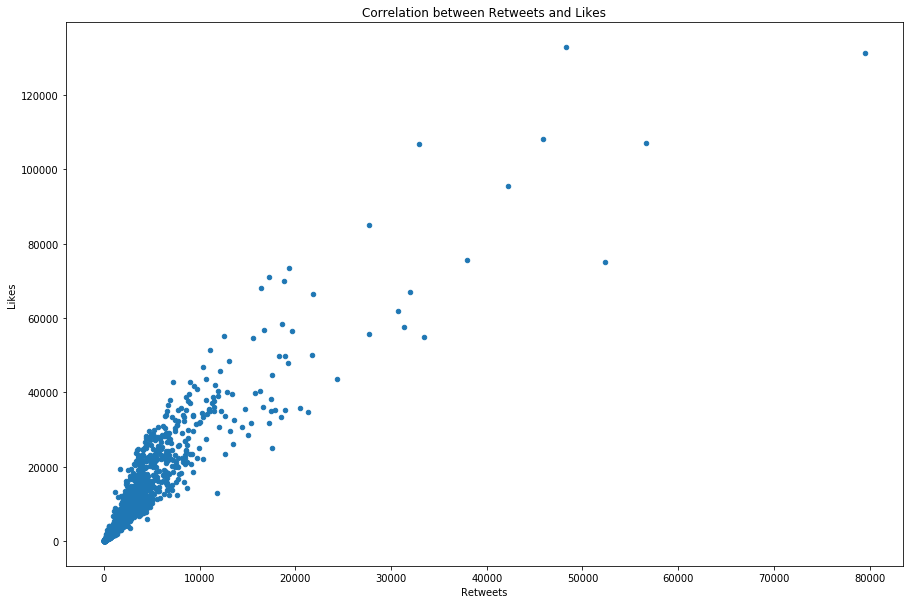

In [102]:
df.plot(x='retweet_count',  y ='favorite_count', kind = 'scatter', figsize = (15,10))
plt.title('Correlation between Retweets and Likes')
plt.xlabel('Retweets')
plt.ylabel('Likes');

In [103]:
from scipy.stats import pearsonr

In [104]:
pearsonr(df.retweet_count, df.favorite_count)

(0.91142619198491903, 0.0)

#### Insight 1: There is a positive correlation between retweets and likes because as retweets increases, likes increases.

### Question 2: Which dog stage has the most likes?

In [105]:
colors=['Blue', 'Gray', 'Gray', 'Gray', 'Gray','Gray','Gray','Gray']

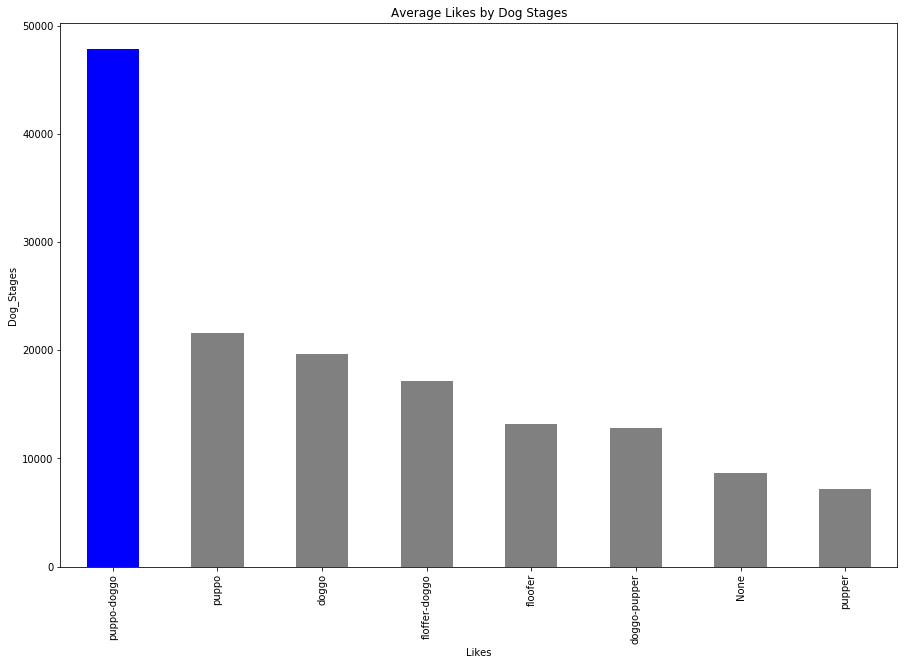

In [106]:
df.groupby('dog_stages')['favorite_count'].mean().sort_values(ascending = False).plot(kind = 'bar', color=colors, figsize =(15,10))
plt.xlabel('Likes')
plt.ylabel('Dog_Stages')
plt.title('Average Likes by Dog Stages');

From the output above, we can see that the dog stage with the highest likes/ favorite count is puppo-doggo and the dog stage with the least likes/favorite count is pupper.

### Question 3: Which dog stage has the most retweets.

In [107]:
colors=['Blue', 'Gray', 'Gray', 'Gray', 'Gray','Gray','Gray','Gray']

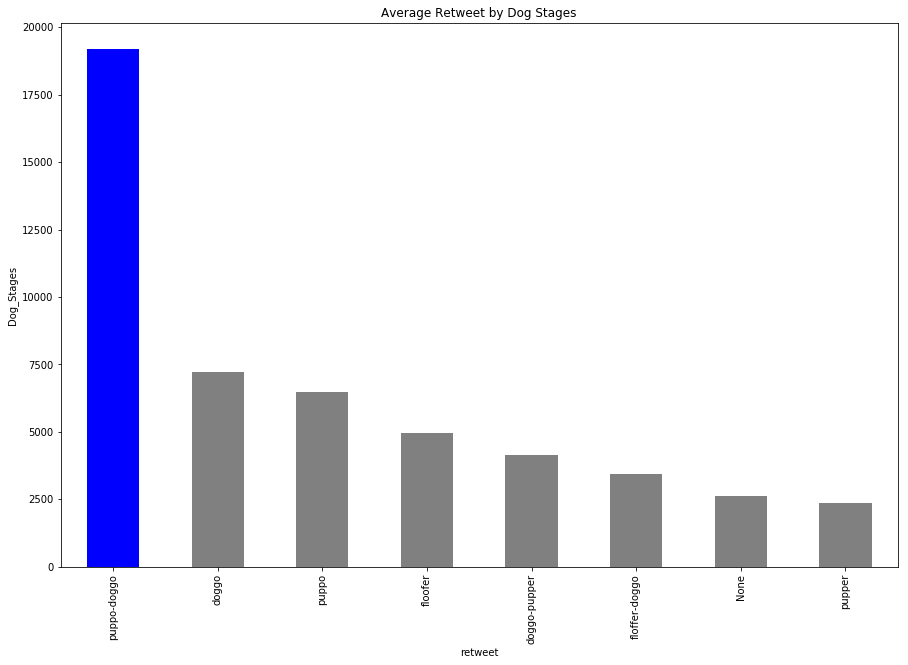

In [108]:
df.groupby('dog_stages')['retweet_count'].mean().sort_values(ascending = False).plot(kind = 'bar', color=colors, figsize =(15,10))
plt.xlabel('retweet')
plt.ylabel('Dog_Stages')
plt.title('Average Retweet by Dog Stages');

From the output above, we can see that the dog stage with the highest retweet count is puppo-doggo and the dog stage with the least likes/favorite count is pupper.

### Question 4: Where was the source tweet gotten from?

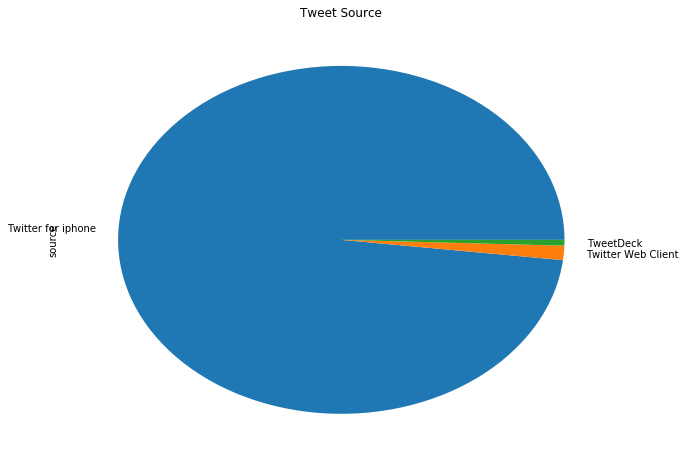

In [110]:
df['source'].value_counts().plot(kind = 'pie', figsize =(10,8))
plt.title('Tweet Source');

## Acknowledgement
To the Past  Alumnis who were ever ready to answer my questions and the community of erudites provided by udacity on slack. This project would not be possible without you.